**<span style="color:red">Namn och CID på gruppmedlemmar: </span>**

FYLL I HÄR

toddb - Todd Bergegårdh


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from scipy import special # Importera funktion för att kunna generera bessel funktioner

In [2]:
# Funktioner för att lösa HUPP:en

def fft2c(x):
    '''
    2D Fourier transform
    
    Denna är perfekt som den är. Bara att använda!
    '''
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))

def ifft2c(x):
    '''
    2D inverse Fourier transform
    
    Denna är perfekt som den är. Bara att använda!
    '''
    return np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))

def rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays):
    '''
    Plottar strålar för HiRISE linsen med olika faskorrektioner
    '''
    
    # Definera start värden för strålarna
    y_rays        = np.linspace(-D_lins/2, D_lins/2, number_of_rays + 1)
    dfidy         = 2*c_2*y_rays + 4*c_4*y_rays**3
    k_y           = dfidy
    
    # Vinkel som strålarna propargerar med
    propvinkel    = np.arcsin(k_y/k0)
    
    # Längd som strålarna propagerar
    L_rays        = 1.1*f_lins
    
    # Slut y-värde för strålarna
    y_rays_prop   = y_rays + L_rays*np.tan(propvinkel)
    
    
    # Arrayer för att plottar strålarna
    x_plot_rays        = np.zeros([2, len(y_rays)])
    x_plot_rays[1, :]  = L_rays
    y_plot_rays        = np.zeros([2, len(y_rays)])
    y_plot_rays[0, :]  = y_rays
    y_plot_rays[1, :]  = y_rays_prop
    
    # Konvertera enheter till cm för plot
    cm = 1e-2
    y_plot_rays_cm = y_plot_rays/cm
    D_lins_cm      = D_lins/cm
    
    # Plotta en linje för fokalplanet för linsen
    x_f_lins = np.array([f_lins, f_lins])
    y_D_lins = np.array([-D_lins_cm/2, D_lins_cm/2])  
    
    
    # Plotta bild med strålar och fokalplanen för linsen
    plt.figure()
    plt.plot(x_plot_rays, y_plot_rays_cm, 'r', linewidth=0.5)
    plt.plot(x_f_lins, y_D_lins, 'black')
    
    plt.xlabel(r'z [m]')
    plt.ylabel(r'y [cm]')
    plt.title(r'Strålgång i HiRISE med korrektion $c_4=$' + str(c_4) + r' [m$^{-4}$]')
    
    # Plotta inzoomad bild med strålar och fokalplanen för linsen
    y_zoom_min = -0.04e-1
    y_zoom_max = np.abs(y_zoom_min)
    z_zoom_min = 3-5e-2
    z_zoom_max = 3+5e-2
    
    y_zoom_min_cm = y_zoom_min/cm
    y_zoom_max_cm = y_zoom_max/cm
    
    plt.figure()
    plt.plot(x_plot_rays, y_plot_rays_cm, 'r', linewidth=0.5)
    plt.plot(x_f_lins, y_D_lins, 'black')
    
    plt.ylim([y_zoom_min_cm, y_zoom_max_cm])
    plt.xlim([z_zoom_min, z_zoom_max])
    
    plt.xlabel(r'z [m]')
    plt.ylabel(r'y [cm]')
    plt.title(r'Inzoomning nära fokus med korrektion $c_4=$' + str(round(c_4, 2)) + r' [m$^{-4}$]')
    
def PSF_radiell(PSF_radiell_ickeparaxiell, N, samplavst_2D):
    '''
    Samplar om din PSF längst en axel till en 2D PSF.
    För att göra detta så interpolerar PSF:en som du har beräknat längst 
    en axel. Sen tar vi fram det radiella avtåndet till alla punkter 
    i uv-planet och använder det för att kalla på interpoleringen av din PSF.
    '''
    # Generera vektorer för 2D sampling
    u_range = N_2D*samplavst_2D/2
    u_2D = np.arange(-u_range, u_range, samplavst_2D)
    v_2D = u_2D
    U_2D, V_2D = np.meshgrid(u_2D, v_2D)

    # Radiellt avstånd till punkter i uv-planet
    R_UV = np.sqrt(U_2D**2 + V_2D**2)                   

    # Sampla om den radiella intensitets funktionen till 2D
    PSF_radiell_2D = np.interp(R_UV, u, PSF_radiell_ickeparaxiell)
    
    return PSF_radiell_2D, u_2D, v_2D

# Uppgift 1 - Beräkning av PSF


#### Komplettera den nästan färdiga givna funktionen PSF (endast två rader behöver kompletteras) så att rutinen beräknar PSFen längs u-axeln för avbildningen i HiRISE!


In [3]:
def PSF(u, L, k, X, Y, T_lins):
    '''
    Beräkna PSF:en i plan två för alla punkter i vektorn u
    '''
    # Initiera vektor för att spara PSF:en
    E_PSF_radiell_ickeparaxiell = np.zeros(len(u), dtype=complex)
    
    
    # Iterera genom alla beräkningspunkterna längs u-axeln
    for i in range(len(u)):
        if i % 10 == 0:
            print(f'Calculating PSF for point: {i} of {len(u)}')
            
        u_current                      = u[i]      # u-koordinat för nuvarande beräkningspunkt                 
        r                              = np.sqrt(L**2 + (X - u_current)**2 + (Y)**2)       # Matris med avstånd från alla sampelpunkter i Plan 1 till aktuell beräkningspunkt
        #dx = dy = 1 only care about relative fields
        E_PSF_radiell_ickeparaxiell[i] = np.sum(np.sum(T_lins * np.exp(1j*k*r) / r))       # Fältet i beräkningspunkten, beräknat med HFM-integralen
        
    return E_PSF_radiell_ickeparaxiell

#### Koden plottar också vad den paraxiella approximationen skulle ge för resultat.

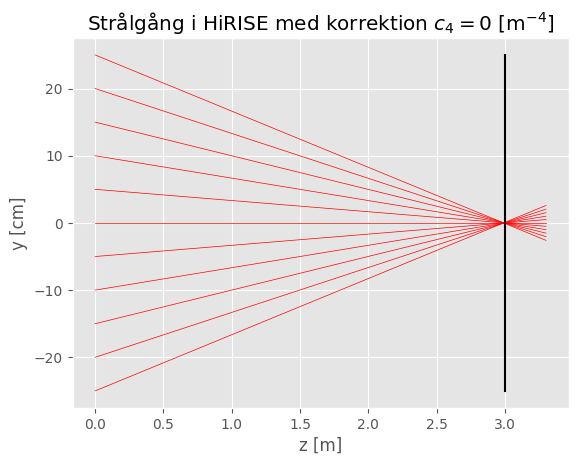

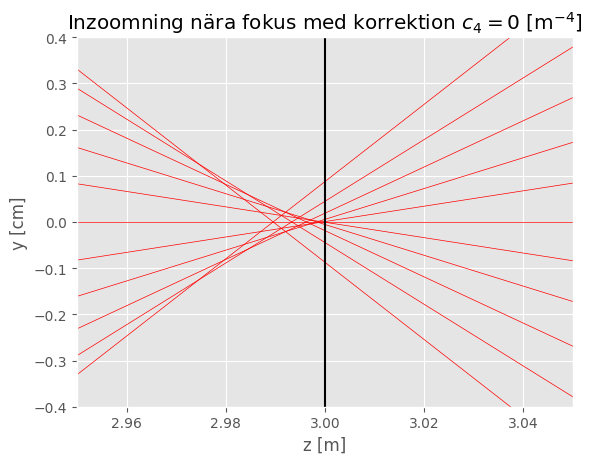

In [4]:
#%% Fixa faskorrektionen för HiRISE speglen %##
### Definerar variabler ###
D_lins         = 0.5              # Linsens diameter   [m]
L              = 3                # Propagations längd [m]
f_lins         = L                # Linsens fokallängd [m]
lam0           = 600e-9           # Våglängd           [m]
k0             = 2*np.pi/lam0     # Vågvektor          [1/m]

number_of_rays = 10               # Antal strålar att plotta


c_2            = -k0/(2*f_lins)   # Linsens fasmodulering
c_4            = 0                # Faskorrektion (För uppgift 1 ska vara c_4 = 0)

### Plottar stålgång för linser ###
rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays)

#### **Jämför det paraxiella resultatet med det optiska systemets verkliga PSF – är du nöjd med den verkliga PSFen?**

Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


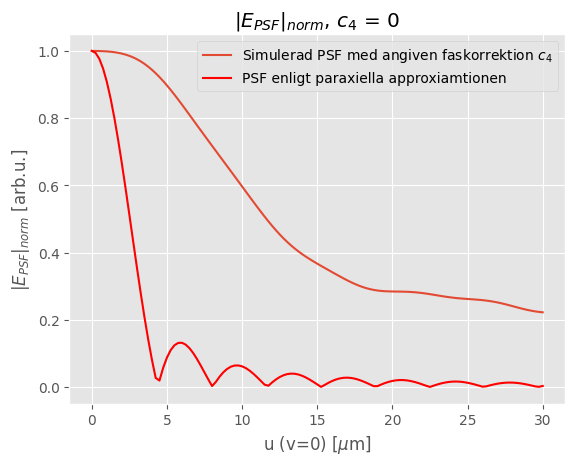

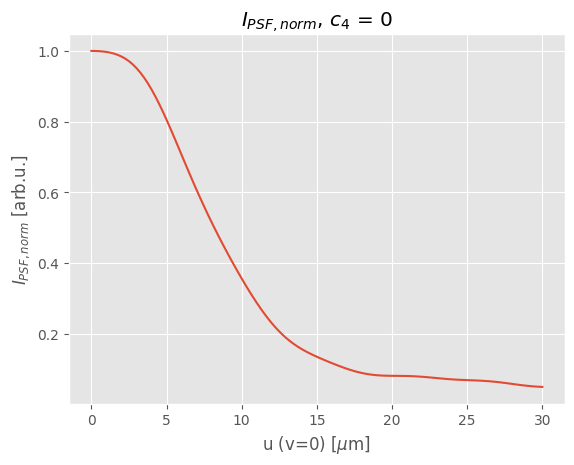

In [5]:
N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavstånd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avstånd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion för linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK för linsen

### Generera punkter längs u-axeln i plan 2 där PSF:en ska beräknas ###
steg_i_u_led = 0.25e-6                            # Samplingslängd längs u-axeln
u_max        = 30e-6                              # Maxlängd för u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner där PSF:en beräknas 

### Beräkna PSF:en längs u-axeln ###
# Komplettera funktionen PSF för att det ska fungera!
E_PSF_radiell_ickeparaxiell = PSF(u, L, k0, X, Y, T_lins)

# Teoretisk PSF. Ska vara mycket lik den beräknande PSF:en med rätt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om värden för att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_norm = np.abs(E_PSF_radiell_ickeparaxiell)/np.abs(E_PSF_radiell_ickeparaxiell[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_norm, label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Beräkna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell = np.abs(E_PSF_radiell_ickeparaxiell)**2
PSF_radiell_ickeparaxiell_norm = PSF_radiell_ickeparaxiell/PSF_radiell_ickeparaxiell[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.show()

*SVARA HÄR*

Det verkar som att funktionerna inte alls stämmer överens särskilt väl. Den simulerade "korrekta" avtar mycket långsammare än lösningen med paraxiell approximation.

# Uppgift 2 - Utför spegelkorrektion!


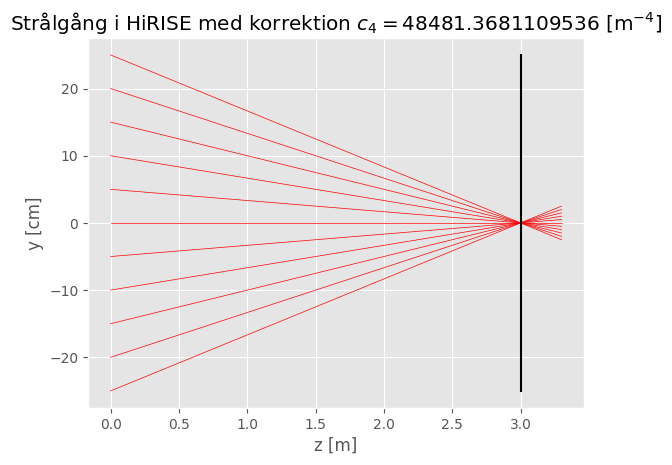

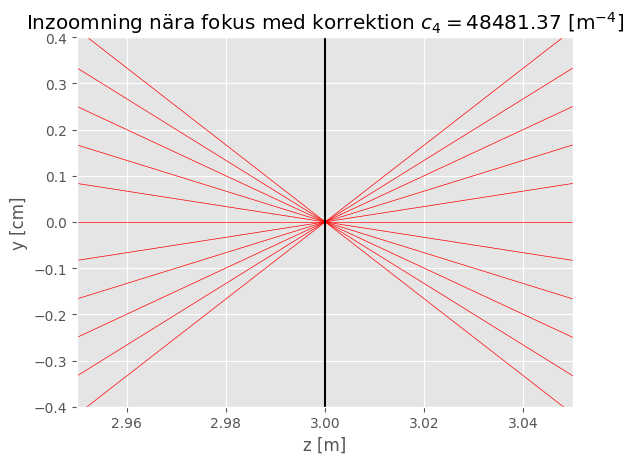

In [6]:
# kod

#%% Fixa faskorrektionen för HiRISE speglen %##
### Definerar variabler ###
D_lins         = 0.5              # Linsens diameter   [m]
L              = 3                # Propagations längd [m]
f_lins         = L                # Linsens fokallängd [m]
lam0           = 600e-9           # Våglängd           [m]
k0             = 2*np.pi/lam0     # Vågvektor          [1/m]

number_of_rays = 10               # Antal strålar att plotta


c_2            = -k0/(2*f_lins)   # Linsens fasmodulering
c_4            = k0/(8*f_lins**3)                # Faskorrektion (För uppgift 1 ska vara c_4 = 0)

### Plottar stålgång för linser ###
rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays)

Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


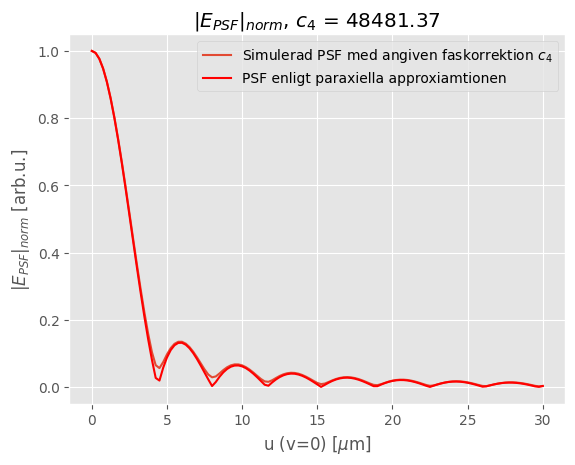

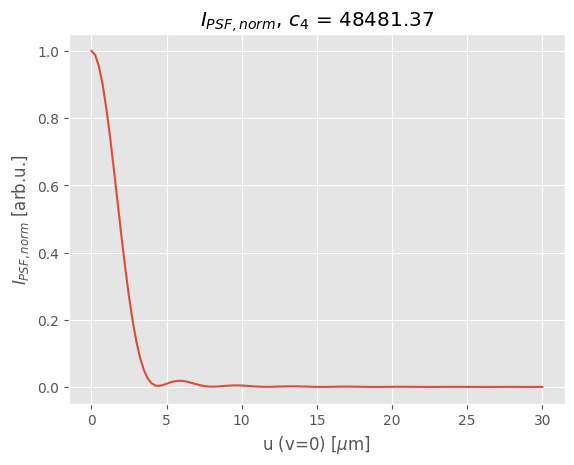

In [7]:
N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavstånd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avstånd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion för linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK för linsen

### Generera punkter längs u-axeln i plan 2 där PSF:en ska beräknas ###
steg_i_u_led = 0.25e-6                            # Samplingslängd längs u-axeln
u_max        = 30e-6                              # Maxlängd för u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner där PSF:en beräknas 

### Beräkna PSF:en längs u-axeln ###
# Komplettera funktionen PSF för att det ska fungera!
E_PSF_radiell_ickeparaxiell_corr = PSF(u, L, k0, X, Y, T_lins)

# Teoretisk PSF. Ska vara mycket lik den beräknande PSF:en med rätt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om värden för att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_corr_norm = np.abs(E_PSF_radiell_ickeparaxiell_corr)/np.abs(E_PSF_radiell_ickeparaxiell_corr[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_corr_norm, label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Beräkna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell_corr = np.abs(E_PSF_radiell_ickeparaxiell_corr)**2
PSF_radiell_ickeparaxiell_corr_norm = PSF_radiell_ickeparaxiell_corr/PSF_radiell_ickeparaxiell_corr[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_corr_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.show()

# Uppgift 3 - Hur stor är korrektionen i mm?

#### **Hur mycket ändras det fysiska djupet hos HiRISE-spegeln genom din faskorrektion?**

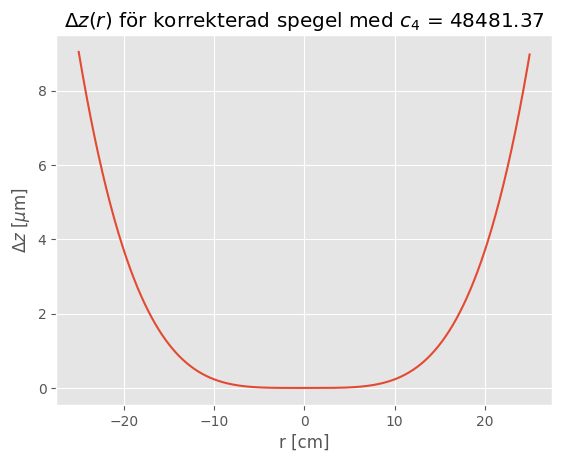

In [8]:
# KOD
N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavstånd

### Generera vektorer och matriser med samplingspunkter ###
r_range = (N/2)*a
r = np.arange(-r_range, r_range, a)

square_term = -k0*r**2 / (2*f_lins)
quartic_term = c_4*r**4

phi_uncorrected = square_term
phi_corrected = square_term + quartic_term

delta_phi = phi_corrected - phi_uncorrected

delta_z = delta_phi / (2*k0)

r_cm = r * 100
delta_z_um = delta_z * 1e+6

plt.figure()
plt.plot(r_cm,delta_z_um)
plt.xlabel("r [cm]")
plt.ylabel("$\\Delta z$ [$\\mu$m]")
plt.title(r'$\Delta z(r)$ för korrekterad spegel med $c_4$ = ' + str(round(c_4, 2)))

plt.show()


*SVARA HÄR*

Spegeln blir 9 mikrometer grundare vid kanten, inte en så stor skillnad om man jämför med spegelns diameter på 25 cm.

# Uppgift 4 - Hål i bilden?

#### Modifiera er anrop till funktionen PSF, genom att komplettera linsens transmissionsfunktion $T_{lins}$ så att den även inkluderar en central blockering med diametern $𝐷_{block} = 15$ cm. Använd den optimerade fasmoduleringen för spegeln som du bestämde i deluppgift 2. Beräkna den PSF som erhålls, och bedöm med din magkänsla huruvida bilden av Marsytan kommer att bli mycket sämre, jämfört med fallet utan blockering! 

Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


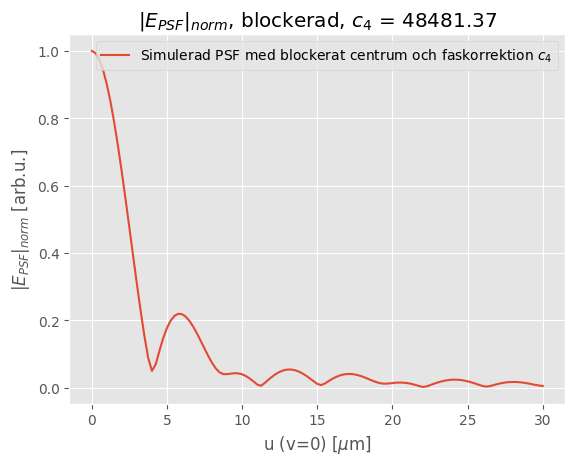

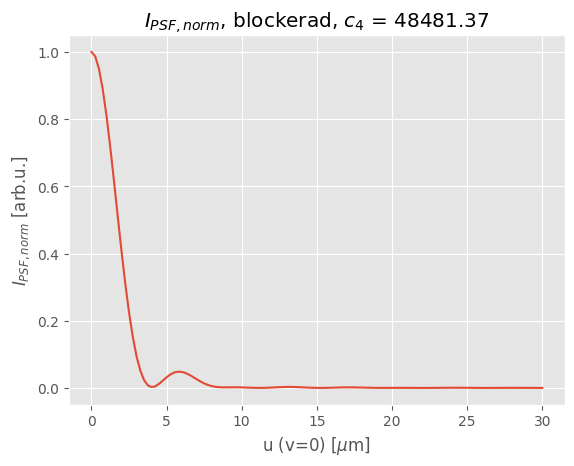

In [9]:
# KOD

N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavstånd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avstånd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion för linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK för linsen

################## blockera
D_block = 0.15
T_lins *= (R>D_block/2)
##################

### Generera punkter längs u-axeln i plan 2 där PSF:en ska beräknas ###
steg_i_u_led = 0.25e-6                            # Samplingslängd längs u-axeln
u_max        = 30e-6                              # Maxlängd för u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner där PSF:en beräknas 

### Beräkna PSF:en längs u-axeln ###
# Komplettera funktionen PSF för att det ska fungera!
E_PSF_radiell_ickeparaxiell_block = PSF(u, L, k0, X, Y, T_lins)


### Plotta PSF:en ###
# Skala om värden för att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_block_norm = np.abs(E_PSF_radiell_ickeparaxiell_block)/np.abs(E_PSF_radiell_ickeparaxiell_block[0])


plt.figure()
plt.plot(u_um, E_PSF_block_norm, label='Simulerad PSF med blockerat centrum och faskorrektion $c_4$')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, blockerad, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Beräkna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell_block = np.abs(E_PSF_radiell_ickeparaxiell_block)**2
PSF_radiell_ickeparaxiell_block_norm = PSF_radiell_ickeparaxiell_block/PSF_radiell_ickeparaxiell_block[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_block_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, blockerad, $c_4$ = ' + str(round(c_4, 2)))
plt.show()

#### **Skapar blockeringen rentav ett mörkt hål i bilden, och i så fall var i bilden uppstår hålet?**

*SVARA HÄR*

Nej, blockeringen skapar inget hål i bilden och detta beror på att vi nu endast betraktar en ljuskälla som befinner sig extremt långt bort, så att allt infallande ljus kan betraktas som en plan våg. Detta leder till att PSF:en inte får ett hål eftersom ljus från punkten fortfarande kan ta sig runt blockeringen och reflekteras in i mitten för att ge en ganska bra PSF. Om vi däremot hade varit närmre teleskopet hade vi fått problem.

PSF:en är inte lika bra som utan blockering, intensiteten stiger lite mera vid 5 um, men jag tror att den kommer ge ganska bra bildupplösning ändå.

# Uppgift 5 - Simulering av bilden av Marsytan i teleskopets detektorplan

#### **<span style="background-color:yellow">Gör simuleringen för två fall:</span>** utan respektive med den centrala cirkulära blockeringen som beskrivs i uppgift 4.

#### **(i)** Bilden av Marsytan, över området där Mark råkar befinna sig. Den täcker ett område av 400×400 meter och har 5000×5000 pixlar. Denna bild kommer att användas som den ”perfekta bilden” på teleskopets detektor. **Vad blir samplingsavståndet hos den perfekta bilden i teleskopets detektorplan?**

In [10]:
N_2D = 5000                                          # Antal samplingspunkter för 2D


object_dist = 250e+3 # distance to mars from page 1

focus_width = (1/f_lins - 1/object_dist)**-1

object_width = 400

focus_height = -focus_width * object_width / object_dist

magnification = (focus_height / object_width) ** -1


sampledist_mars = object_width / N_2D
sampledist_detector = sampledist_mars / magnification



samplavst_2D = sampledist_detector

print(f"sannt axiellt fokusavstånd: {focus_width:.6f} m")
print(f"förstoring: {magnification:.0f}")
print(f"samplingavstånd på mars yta: {sampledist_mars*100:.2f} cm")
print(f"samplingavstånd på detektorn: {sampledist_detector*1e+9:.2f} nm")

sannt axiellt fokusavstånd: 3.000036 m
förstoring: -83332
samplingavstånd på mars yta: 8.00 cm
samplingavstånd på detektorn: -960.01 nm


#### **(ii)** Du har redan beräknat PSFen för avbildningen, med den korrigerade linsen. Denna PSF ska du använda för att simulera hur bilden av Marsytan blir. För att använda faltningssatsen måste din radiella PSF samplas om till en tvådimensionell funktion i $(𝑢,𝑣)$-planet, med samma samplings-avstånd och matrisstorlek som den perfekta bilden: Använd den färdiga funktionen PSF_radiell med ditt värde på $𝑐_4$ för den korrigerade linsen för att skapa en matris som innehåller PSFen i teleskopets detektorplan, med samma samplingsavstånd och matrisstorlek som den perfekta bilden. Zooma in centrum av matrisen för att se att din PSF verkar OK!

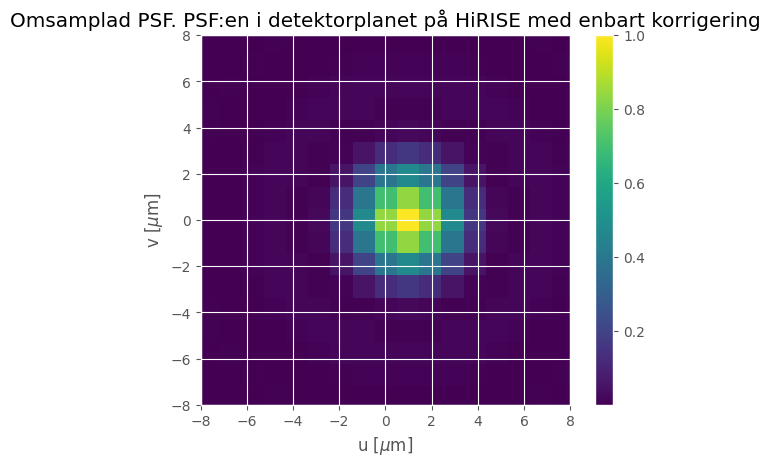

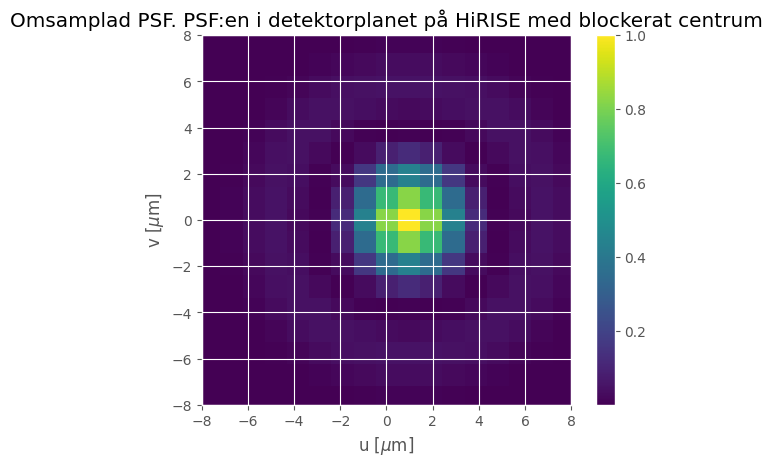

In [11]:
# Skapa radiell 2D PSF
PSF_radiell_2D_corr, u_2D, v_2D = PSF_radiell(PSF_radiell_ickeparaxiell_corr, N, samplavst_2D)
PSF_radiell_2D_block, _, _ = PSF_radiell(PSF_radiell_ickeparaxiell_block, N, samplavst_2D)

u_2D_um = u_2D*1e6
v_2D_um = v_2D*1e6

# Normalisering för plottning
PSF_radiell_2D_corr_norm = PSF_radiell_2D_corr/np.max(PSF_radiell_2D_corr)
PSF_radiell_2D_block_norm = PSF_radiell_2D_block/np.max(PSF_radiell_2D_block)

# Plotta den 2D samplade PSF:en
plt.figure()
image = plt.imshow(PSF_radiell_2D_corr_norm, extent = [u_2D_um.min(), u_2D_um.max(), v_2D_um.min(), v_2D_um.max()])
plt.colorbar(image)

plt.xlabel(r'u [$\mu$m]')
plt.ylabel(r'v [$\mu$m]')
plt.title(r'Omsamplad PSF. PSF:en i detektorplanet på HiRISE med enbart korrigering')

# Zooma in på PSF:en
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.show()

#########################

plt.figure()
image = plt.imshow(PSF_radiell_2D_block_norm, extent = [u_2D_um.min(), u_2D_um.max(), v_2D_um.min(), v_2D_um.max()])
plt.colorbar(image)

plt.xlabel(r'u [$\mu$m]')
plt.ylabel(r'v [$\mu$m]')
plt.title(r'Omsamplad PSF. PSF:en i detektorplanet på HiRISE med blockerat centrum')

# Zooma in på PSF:en
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.show()


#### **(iii)** Läs in den perfekta bilden (för enkelhets skull har bilden gjorts om till gråskala). Zooma in i bilden, ungefär som markeras ovan, så att du förvissar dig om att Marks rover, hans fotspår och roverns hjulspår finns med!

(1200.0, 3000.0)

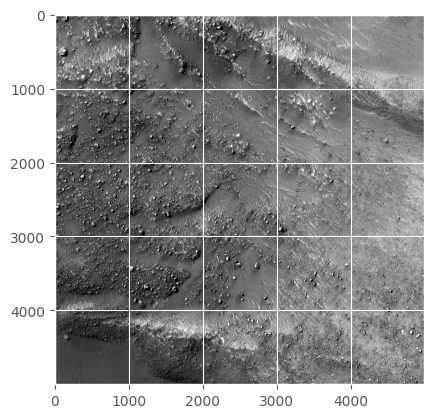

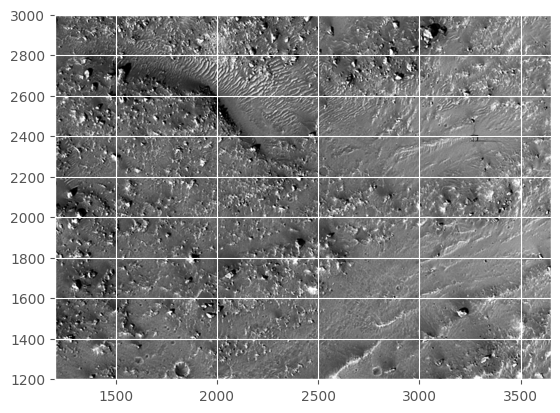

In [12]:
# Inläsning av bild. Bilden måste ligga i samma map som ni kör skriptet från.
perfect_image = plt.imread('highly_resolved_photo_of_Marks_surroundings.jpg')

plt.figure()
plt.imshow(perfect_image, cmap='gray')

plt.figure()
plt.imshow(perfect_image, cmap='gray')

# Använd xlim och ylim för att zooma in i bilden och hitta rovern
plt.xlim([1200, 3650])
plt.ylim([1200, 3000])

#### **(iv)** Falta den erhållna tvådimensionella PSFen med den perfekta bilden för att få den verkliga intensitetsfördelningen i detektorplanet!

convolving images
saving image
plotting


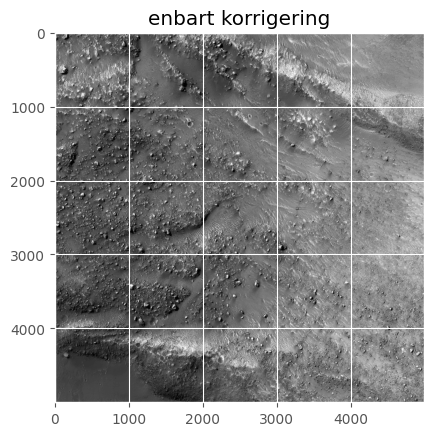

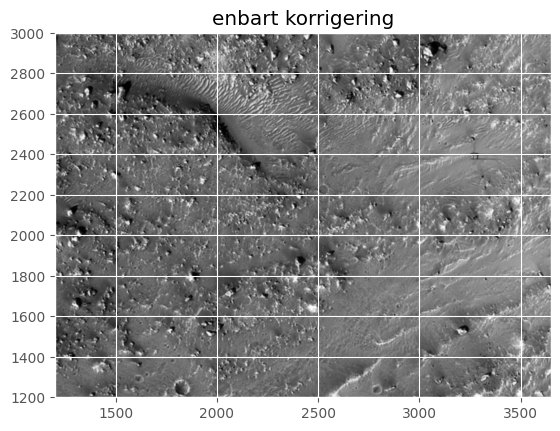

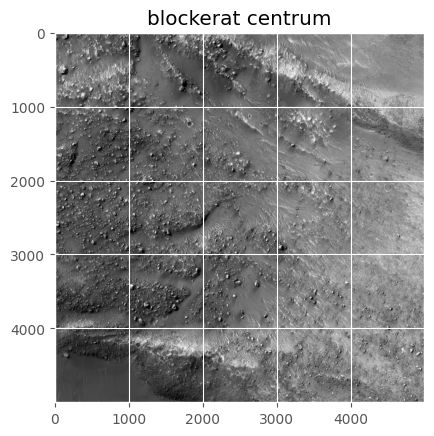

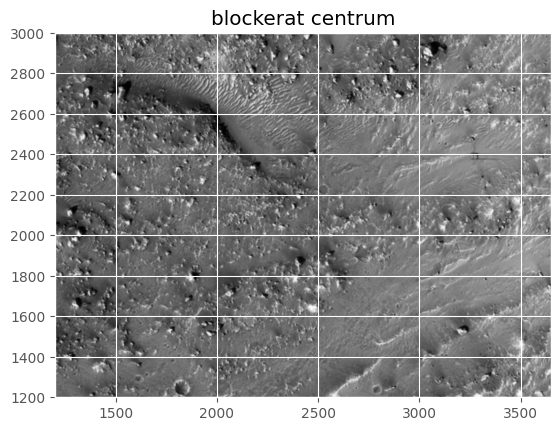

In [13]:

print("convolving images")
imgconv = fft2c(perfect_image)
image_PSF_corr = ifft2c(imgconv * fft2c(PSF_radiell_2D_corr))
image_PSF_block = ifft2c(imgconv * fft2c(PSF_radiell_2D_block))

# builtin view  in vscode is too bad to make out the details
print("saving image")
plt.imsave("corr.png", np.real(image_PSF_corr), cmap="gray")
plt.imsave("block.png", np.real(image_PSF_block), cmap="gray")


print("plotting")
plt.figure()
plt.imshow(np.real(image_PSF_corr), cmap='gray')
plt.title("enbart korrigering")


plt.figure()
plt.imshow(np.real(image_PSF_corr), cmap='gray')
plt.title("enbart korrigering")


# Använd xlim och ylim för att zooma in i bilden och hitta rovern
plt.xlim([1200, 3650])
plt.ylim([1200, 3000])

########################

plt.figure()
plt.imshow(np.real(image_PSF_block), cmap='gray')
plt.title("blockerat centrum")

plt.figure()
plt.imshow(np.real(image_PSF_block), cmap='gray')
plt.title("blockerat centrum")

# Använd xlim och ylim för att zooma in i bilden och hitta rovern
plt.xlim([1200, 3650])
plt.ylim([1200, 3000])
plt.show()

####  **Vad säger du, är The Martian sann?**

*SVARA HÄR*

I detta fallet, ja, det är enkelt att urskilja både hjulspåren och fotspåren på marsytan.